# GFER Plamitate 5h April 2019
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [2]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [3]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [4]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

Basic packages versions:
   Python version: 3.7.0 (default, Jun 28 2018, 08:04:48) [MSC v.1912 64 bit (AMD64)]
   Packages:
   json: 2.0.9
   numpy: 1.15.4
   pandas: 0.23.4
   seaborn: 0.9.0


# General

# Loading the data

In [5]:
data_path = "../Data/Palmitate/5h/Saja based on Tzakhi 2200 Object NEW.2019.04.03.10.40.47.xlsx"
df = pd.read_excel(data_path, sheet_name='Nuc_cell_TMRE_MITOTRACKER', header=0, skiprows=[0])

In [6]:
# remove redundent column
df.drop("Target",axis=1, inplace=True)
# extract the positional data 
loc_df = df.Section.str.extract("(.*) - (.*) \(fld (.*)\).*",expand=True)
loc_df.columns=["row","column", "field"]
loc_df.column = loc_df['column'].astype(np.int16)
df = pd.concat([df, loc_df], axis=1)
df.drop("Section",axis=1, inplace=True)

In [7]:
df.head(7)

TMRE AREA  TMRE POS X  TMRE POS Y  TMRE INTENSITY  TMRE FORM FACTOR  TMRE COUNT     TMRE DxA  TMRE mean int  TMRE mean area  TMRE mean length  TMRE Sum Length  MITOTRECKER AREA  MITO POS Y  MITOTRACKER DxA  MITOTRACKER FORM FACTOR  MITOTRACKER INTENSITY  MITOTRACKER COUNT  MITO POS X  Mitotracker mean int  Mtiotracker mean area  Mitotracker mean length  Mitotracker Sum Length  NUCLEAR DXA  NUC CG X  NUC CG Y  NUC FORM FACTOR  NUC MEDIAN DENSITY  NUCLEAR PARIMETER  NUCLEAR WRMI  NUCLEUS MAX CHORD  NUCLEAR AVG DIAMETER  NUCLEAR MED DIAMETER  NUCLEAR AREA  NUCLEAR INTENSITY  CELL INTENSITY     CELL DXA  CELL AREA  CELL FORM FACTOR  CELL FIBER LENGTH  CELL END NODES  CELL PARIEMETER  CELL AVG  DIAMETER  CELL MED DIAMETER  CELL FRMI  CELL LENGTH  CELL CROSSING POINTS  CELL BRANCH NODES row  column field
0    149.039   25865.066   33159.389      341950.685             0.944          55  1063352.437       7134.721           2.710             2.268          124.738           228.153   34857.253      1425418.504                    1.034             277315.753                 58   27287.146              6247.631                  3.934                    2.190                 127.018   226888.121   469.673   596.030            0.891               755.0             64.873         1.046             25.268                13.734                13.753       298.395            760.361        2800.901  5809007.314   2073.978             0.142            453.623              35          428.182              13.734             13.753      0.740      156.104                     1                 30   B       2     1
1    107.845   40295.745   42136.441      457278.886             1.012          75   742198.504       6882.102           1.438             1.752          131.385           220.231   34887.707      1311894.008                    0.964             298829.918                 63   33982.387              5956.888                  3.496                    2.211                 139.296   200833.317   531.243   573.131            0.902               847.0             57.756         1.005             22.257                19.304                15.168       239.350            839.079        2935.882  5451684.726   1856.915             0.248            304.762              22          306.855              19.304             15.168      0.967       80.284                     0                 16   B       2     1
2    106.577    5842.745   37614.562      401374.583             0.965          68   666113.985       6250.059           1.567             1.641          111.597            82.706   36642.561       409133.061                    0.996             299447.355                 66    5968.491              4946.860                  1.253                    1.545                 101.989   184720.405    82.254   547.435            0.745               644.0             69.327         1.165             25.456                21.227                15.540       285.086            647.946        2409.352  7868372.916   3265.763             0.156            482.164              30          512.870              21.227             15.540      1.188      147.320                     3                 22   B       2     1
3    149.250   40025.811   47084.552      564173.980             1.019          91  1036492.125       6944.654           1.640             1.726          157.070           310.753   55274.703      1970758.736                    1.048             506976.730                106   46185.362              6341.873                  2.932                    2.048                 217.062   217938.170   433.504   525.588            0.860               790.0             63.428         1.055             25.596                19.870                 7.789       275.263            791.746        3087.738  9631454.683   3119.259             0.137            537.448              29          535.753              19.870              7.789      0.747      161.1

In [8]:
df["Patient"] = np.nan
df.loc[df.column.isin([2, 3]), "Patient"] = "AV"
df.loc[df.column.isin([4, 5]), "Patient"] = "AG015"
df.loc[df.column.isin([6, 7]), "Patient"] = "EV"
df.loc[df.column.isin([8, 9]), "Patient"] = "CM"
df.loc[df.column.isin([10, 11]), "Patient"] = "progeria127"
display('ok'if df["Patient"].isna().any()==False else ':-(')

'ok'

In [9]:
patient_plate = df.groupby(['column', 'row']).Patient.first().unstack(level=-1).T
patient_plate

column  2   3      4      5   6   7   8   9            10           11
row                                                                   
B       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
C       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
D       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
E       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
F       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127
G       AV  AV  AG015  AG015  EV  EV  CM  CM  progeria127  progeria127

_normal_ - normal media with 10% FBS  
_palmitate_ - palmitate media with 10% BSA and 10% dyalized serum 

In [10]:
df["Compound"] = np.nan
df.loc[df.column.isin([2,4,6,8,10]), "Compound"] = "Normal"
df.loc[df.column.isin([3,5,7,9,11]), "Compound"] = "Palmitate"

display('ok'if df["Patient"].isna().any()==False else ':-(')

'ok'

In [11]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

column      2          3       4          5       6          7       8          9       10         11
row                                                                                                  
B       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
C       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
D       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
E       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
F       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate
G       Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate  Normal  Palmitate

# Number of cells 


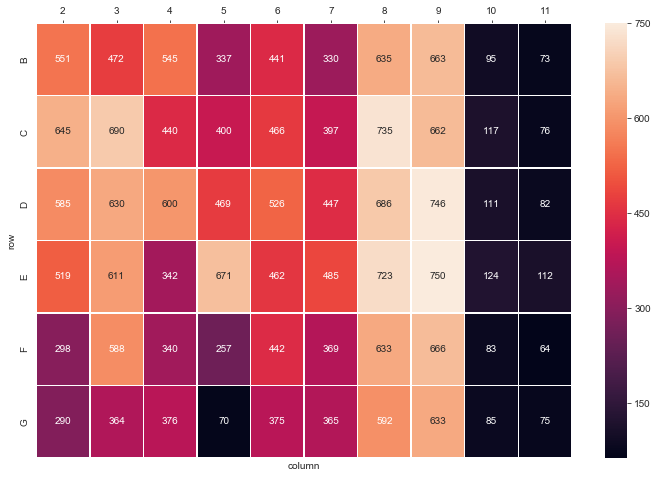

In [12]:
cell_in_well = df.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [13]:
order = ['Normal', 'Palmitate']

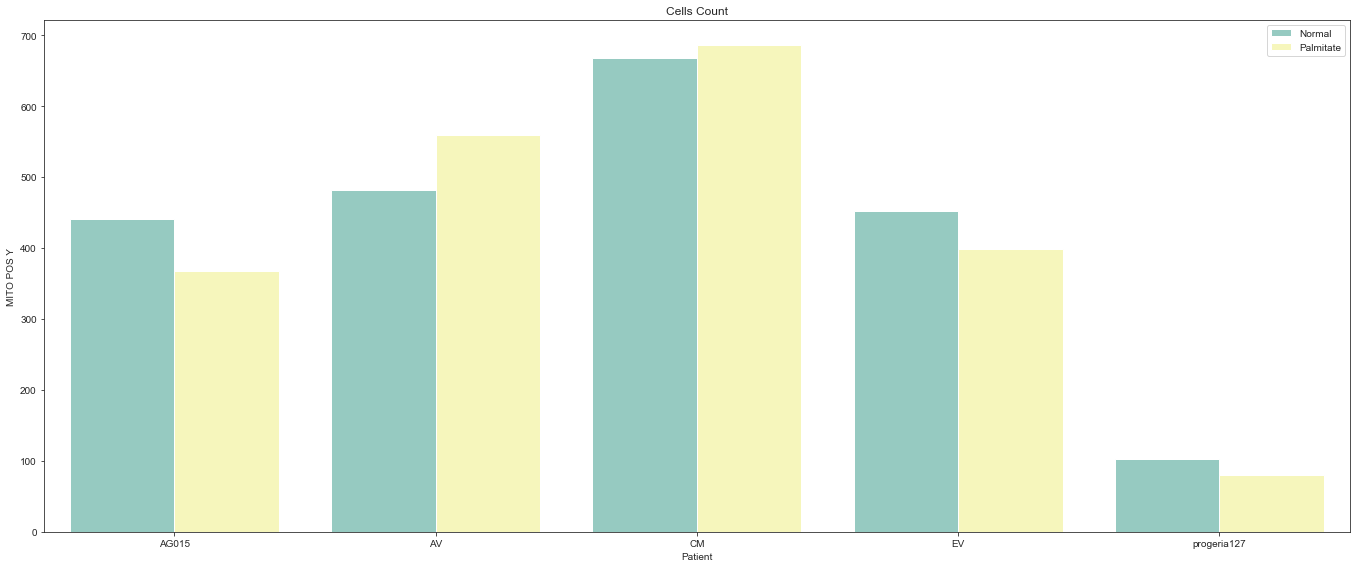

In [14]:
g = df.groupby(["row", "column", "Patient", "Compound"])["MITO POS Y"].count()
g = g.groupby(["Patient", "Compound"]).mean().reset_index()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Patient", y="MITO POS Y", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()


# Analyzing the features

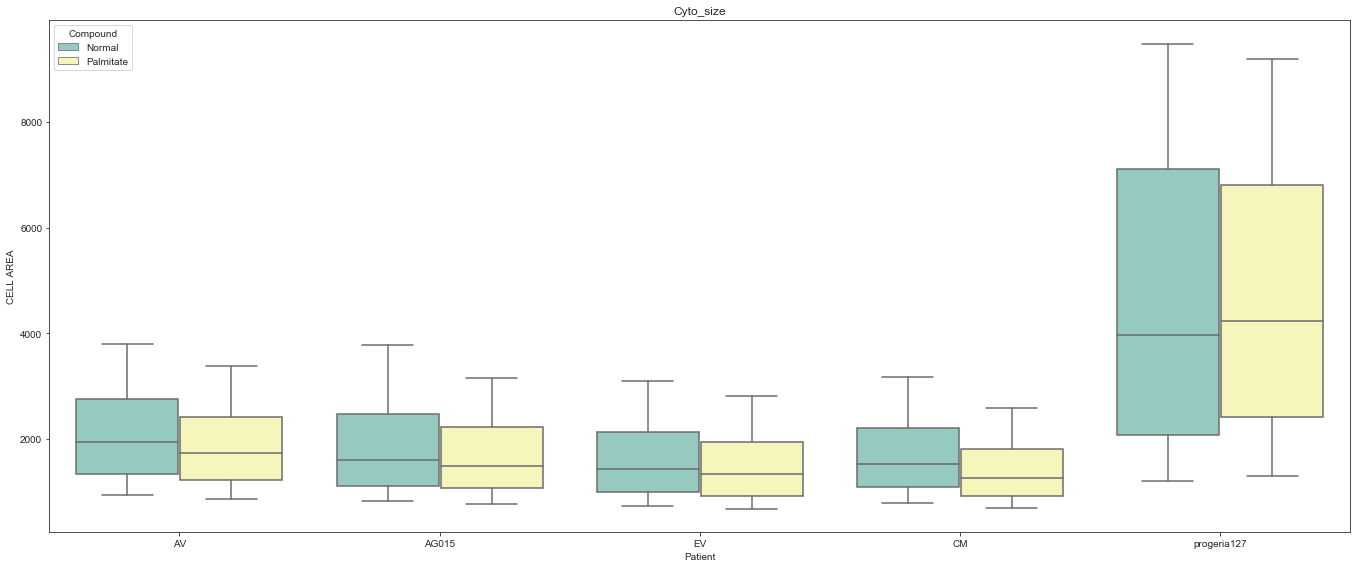

In [15]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="CELL AREA", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

Progeria cell area is very distinctly different.  
In all cases Palmitate decreased the cell area (excluding the Progeria cells).  

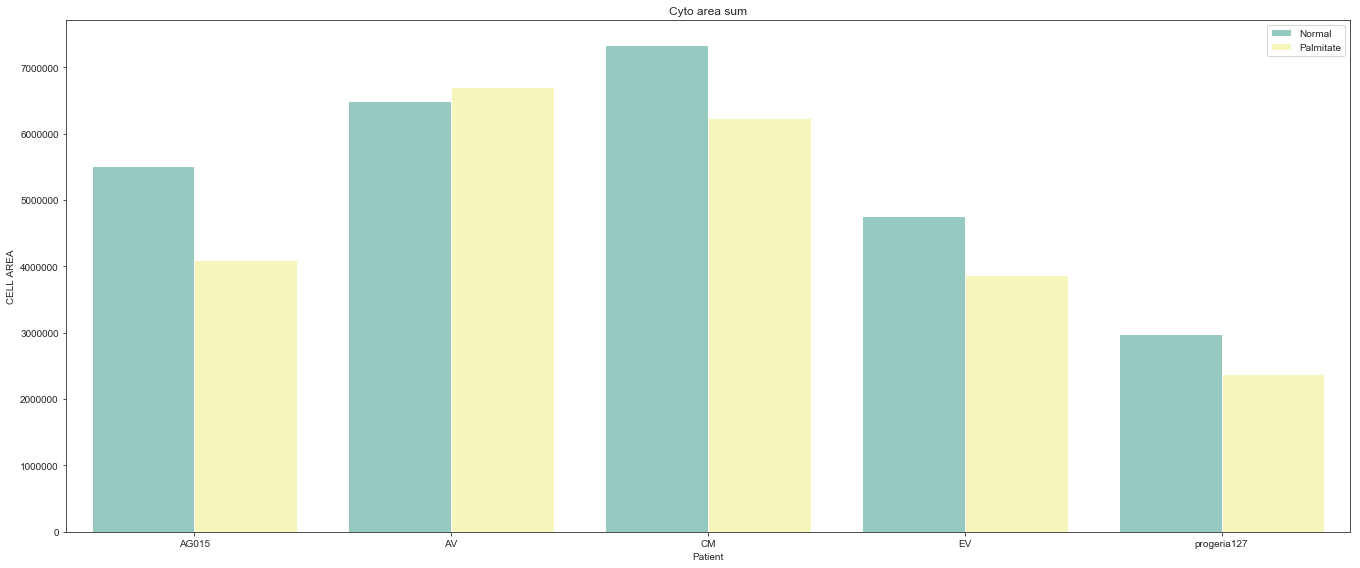

In [16]:
g = df.groupby(['Patient', 'Compound'])["CELL AREA"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Patient", y="CELL AREA", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cyto area sum")
ax.legend(loc = 1)
plt.tight_layout()


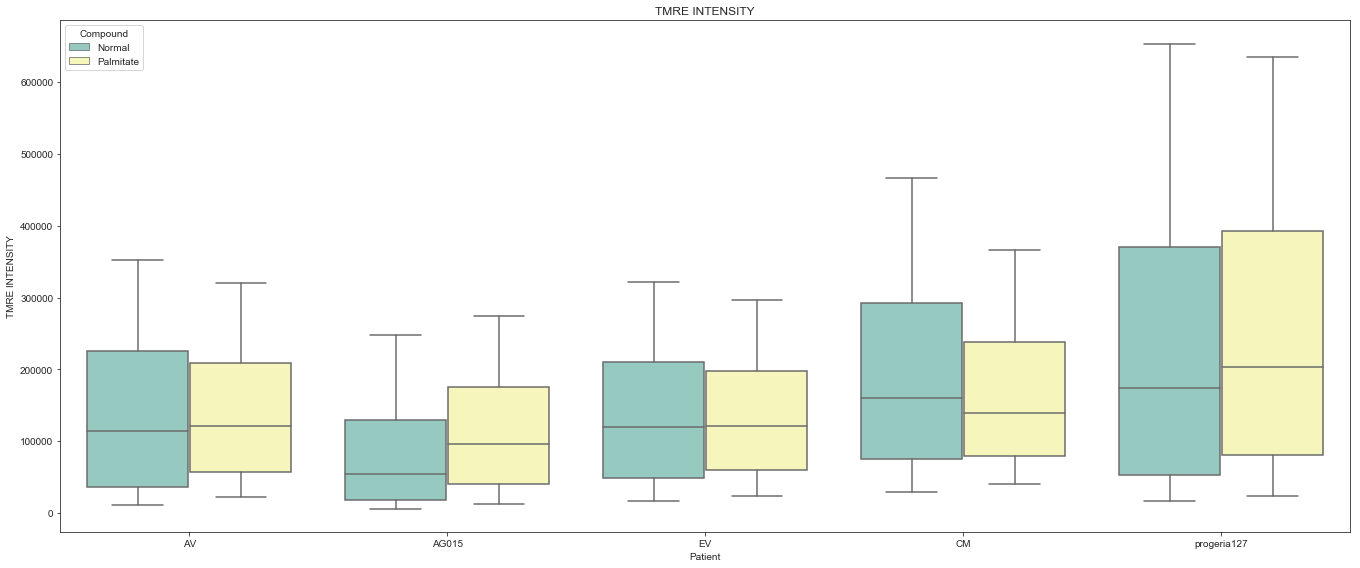

In [17]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE INTENSITY", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE INTENSITY")
plt.tight_layout()

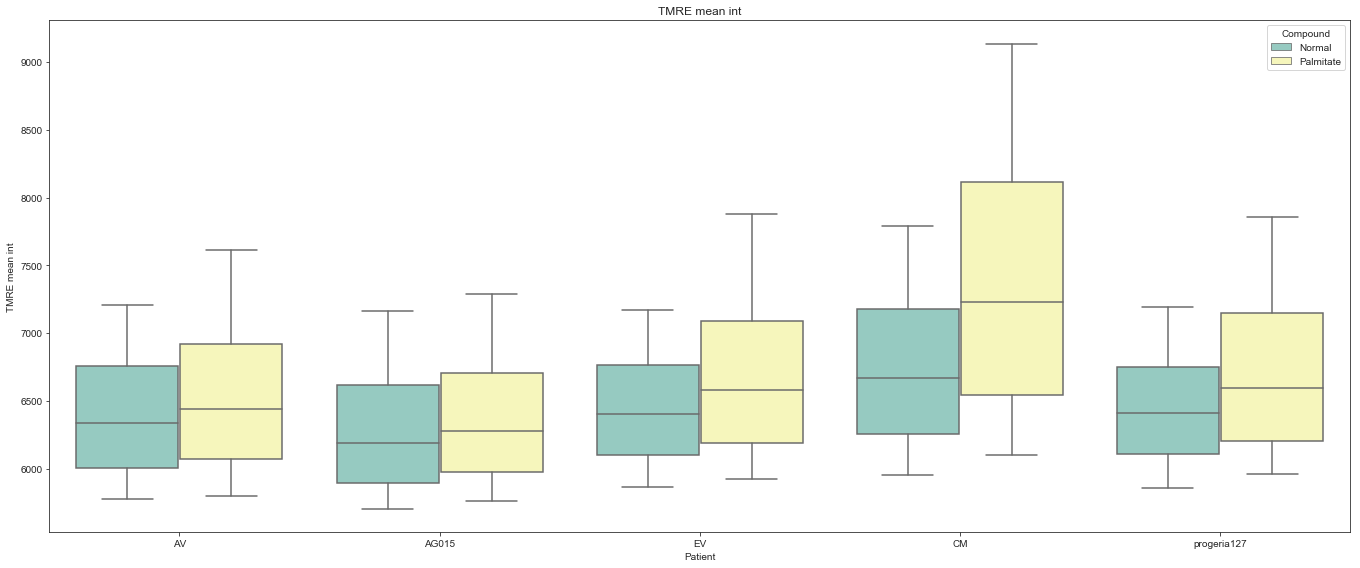

In [18]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE mean int", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE mean int")
plt.tight_layout()

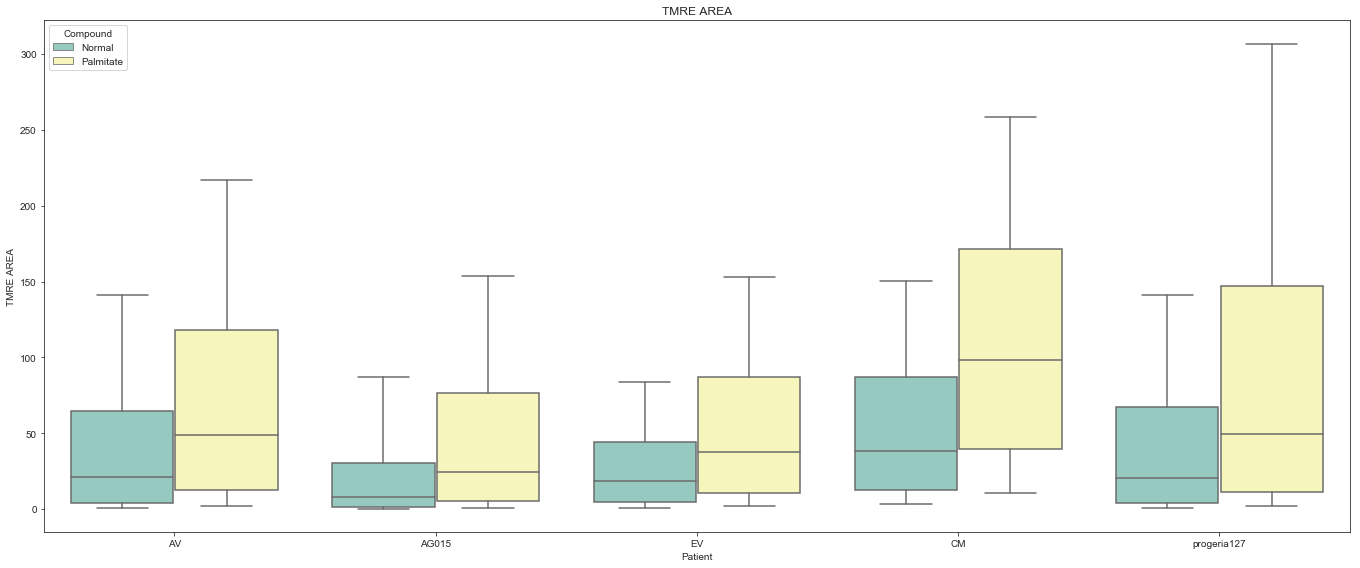

In [19]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE AREA", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE AREA")
plt.tight_layout()

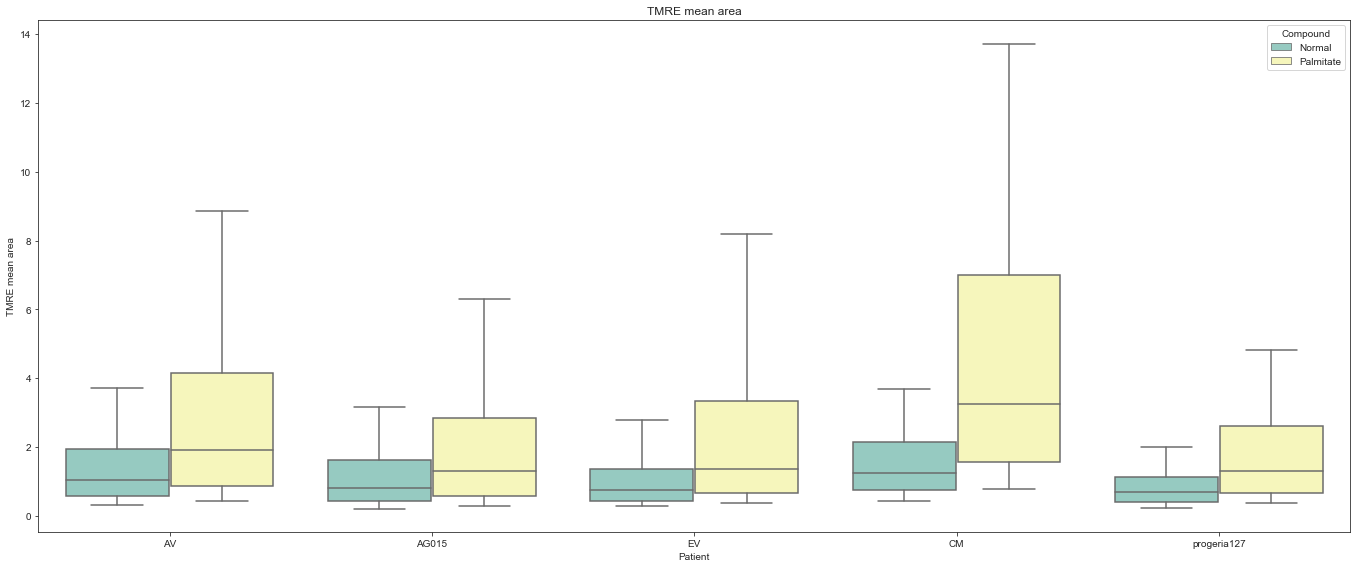

In [20]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE mean area", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE mean area")
plt.tight_layout()

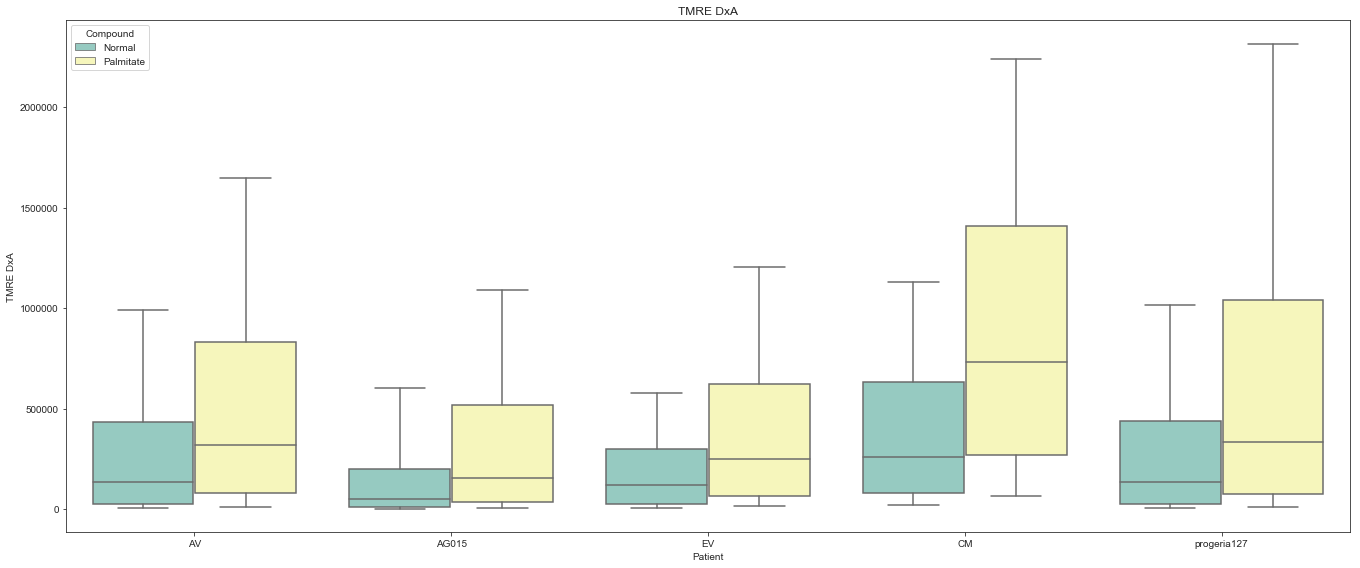

In [21]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE DxA", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE DxA")
plt.tight_layout()

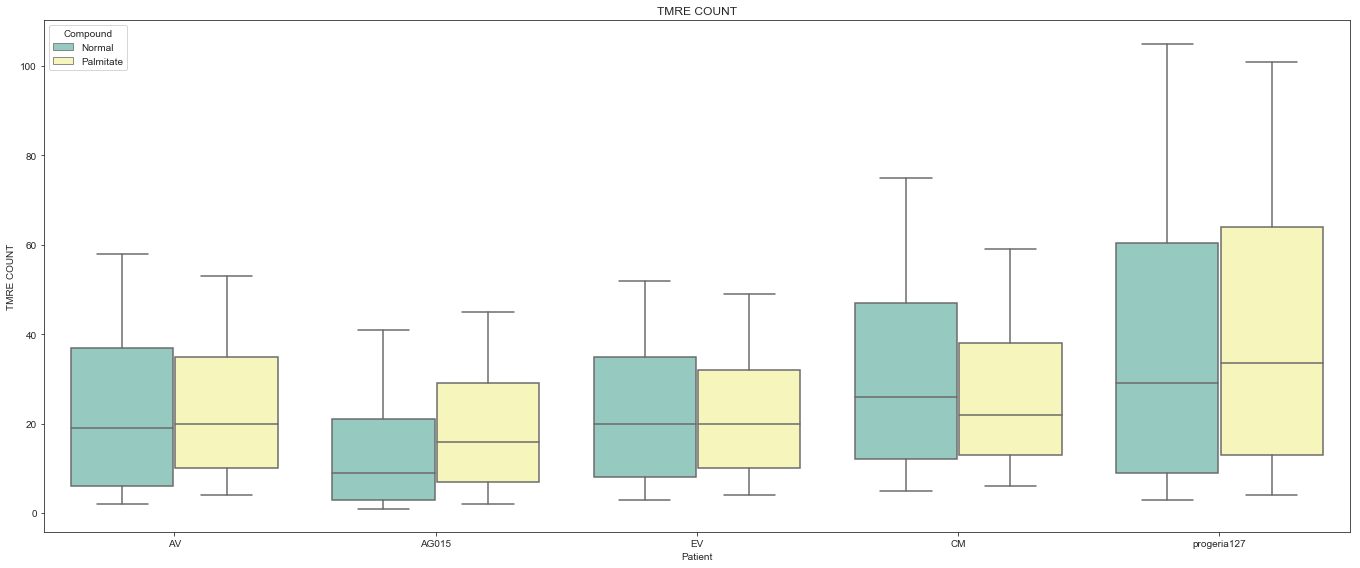

In [31]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y='TMRE COUNT', hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title('TMRE COUNT')
plt.tight_layout()

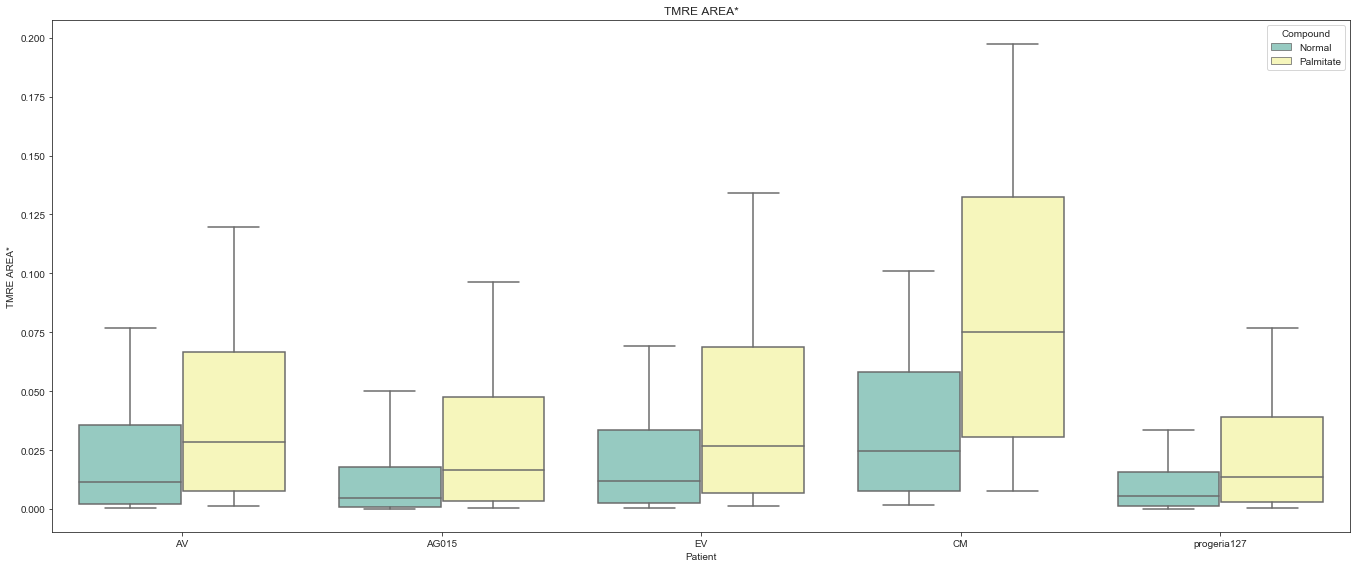

In [22]:
df['TMRE AREA*'] = df['TMRE AREA']/df['CELL AREA']
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y='TMRE AREA*', hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title('TMRE AREA*')
plt.tight_layout()

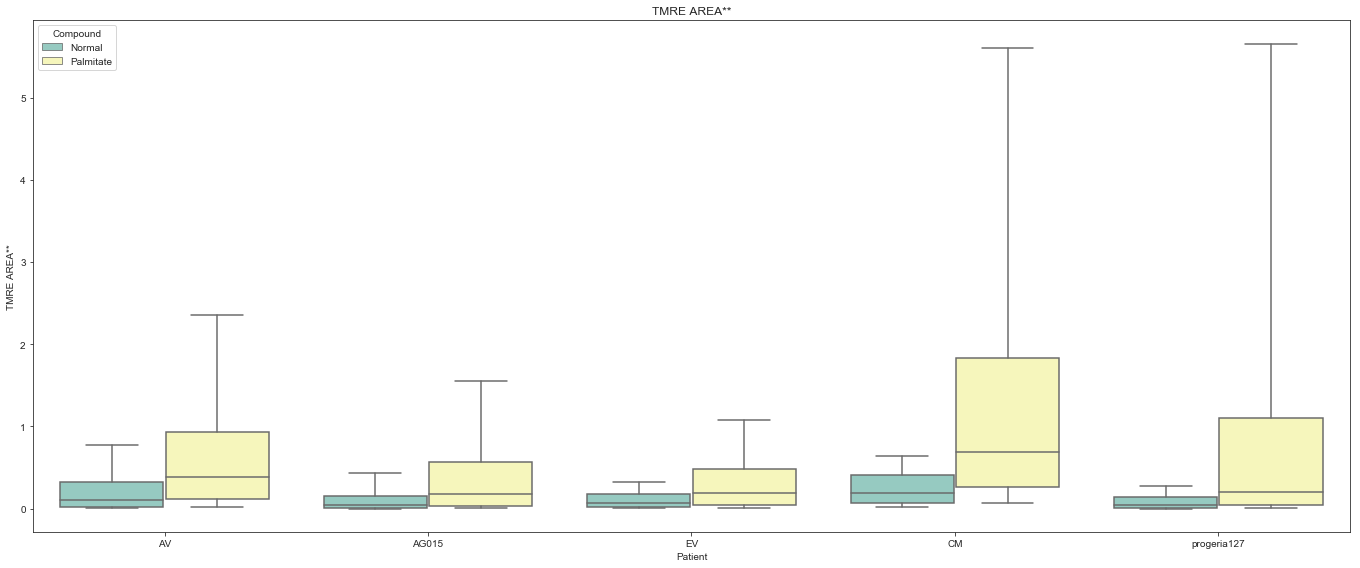

In [23]:
df['TMRE AREA**'] = df['TMRE AREA']/df['MITOTRECKER AREA']

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="TMRE AREA**", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("TMRE AREA**")
plt.tight_layout()

As the numbers are above 1.0, does it means there is a lot more TMRE then mitotracker?   
Lets look at the mitochondria

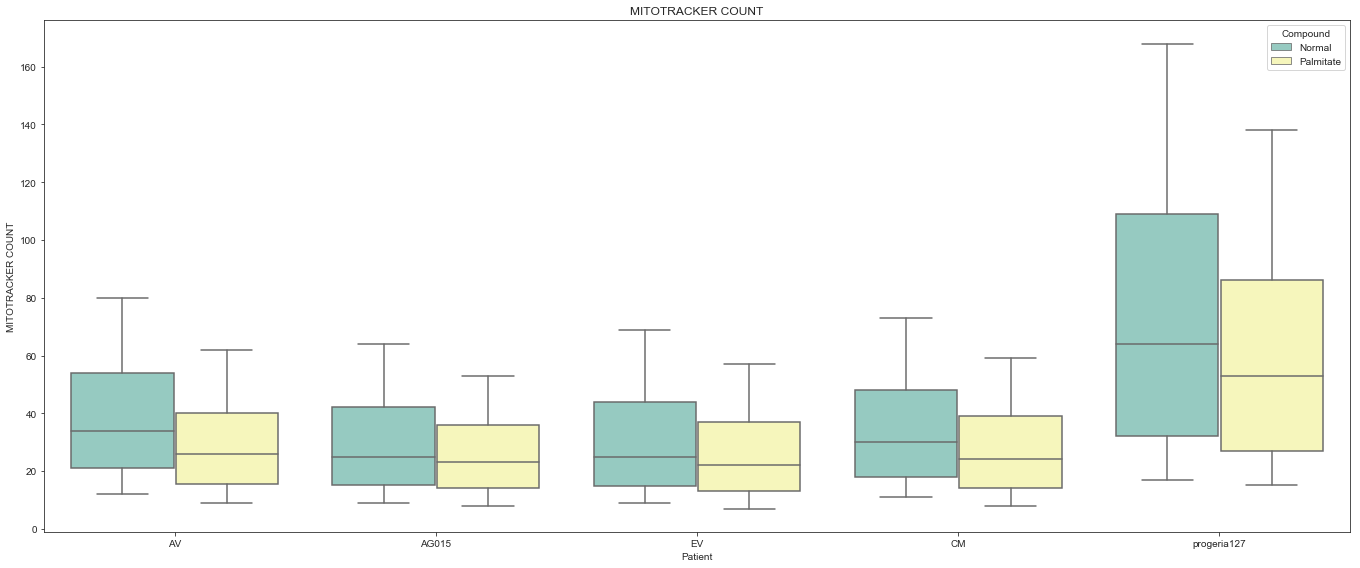

In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MITOTRACKER COUNT", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MITOTRACKER COUNT")
plt.tight_layout()

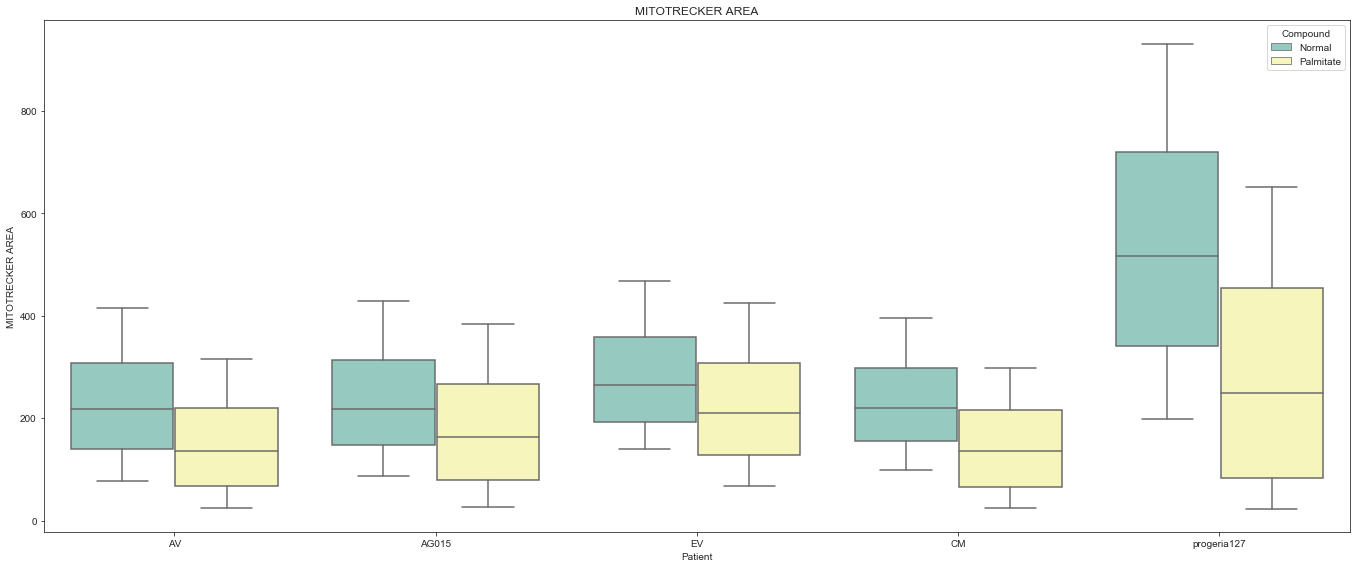

In [25]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MITOTRECKER AREA", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MITOTRECKER AREA")
plt.tight_layout()

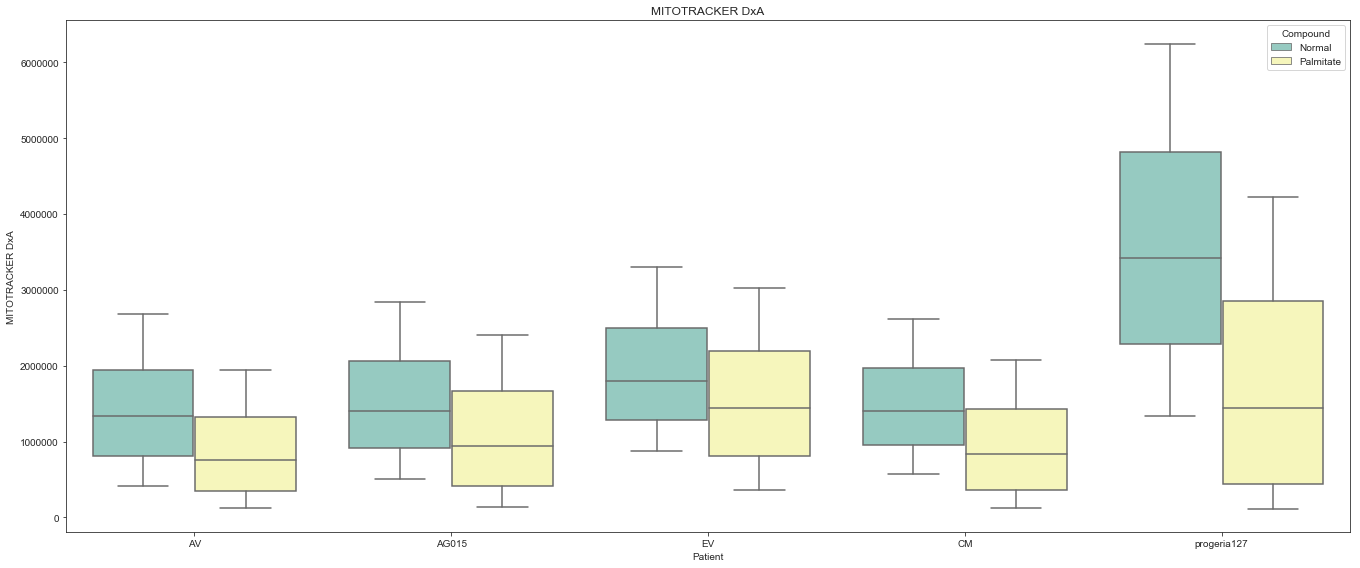

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MITOTRACKER DxA", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MITOTRACKER DxA")
plt.tight_layout()

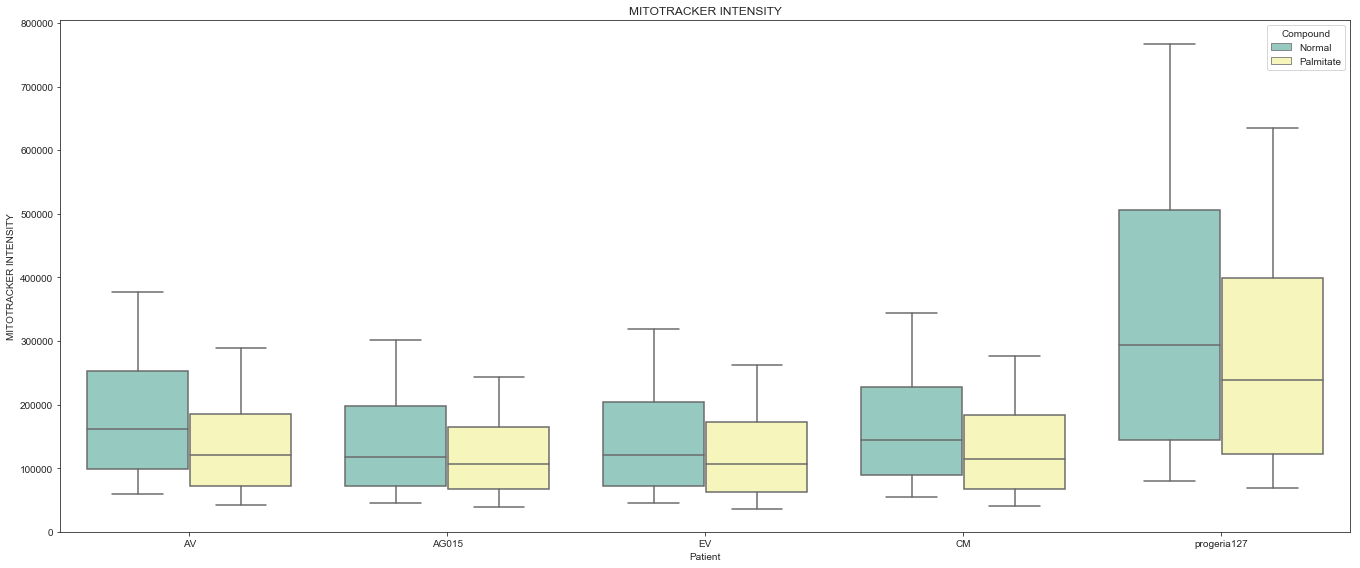

In [27]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MITOTRACKER INTENSITY", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MITOTRACKER INTENSITY")
plt.tight_layout()

In all aspects it seems like Palmitate is not doing so good to the mitochondria

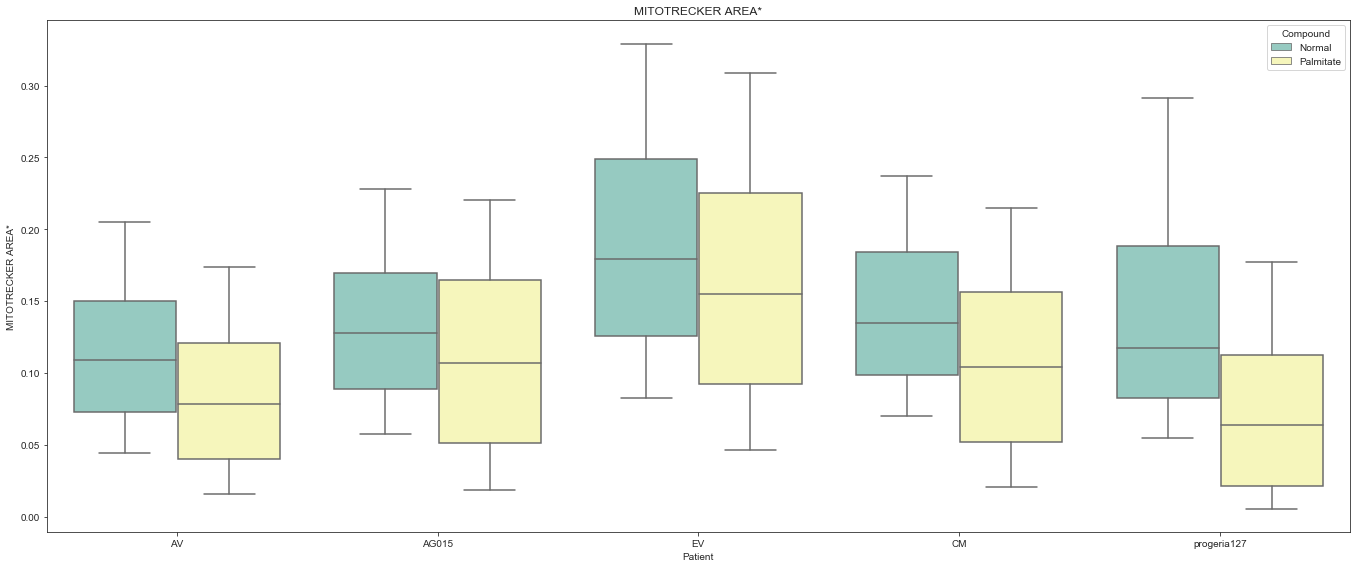

In [28]:
df['MITOTRECKER AREA*'] = df['MITOTRECKER AREA']/df['CELL AREA']
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MITOTRECKER AREA*", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MITOTRECKER AREA*")
plt.tight_layout()

It look like given Palmitate the TMRE area increases while the MitoTracker area decreases

In [32]:
# df.columns.tolist()